In [7]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [8]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [15]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [16]:
model = model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
result = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8949 - loss: 0.3008
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8985 - loss: 0.2859
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9002 - loss: 0.2777
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9028 - loss: 0.2754
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9085 - loss: 0.2617


In [21]:
result.history.keys()

dict_keys(['accuracy', 'loss'])

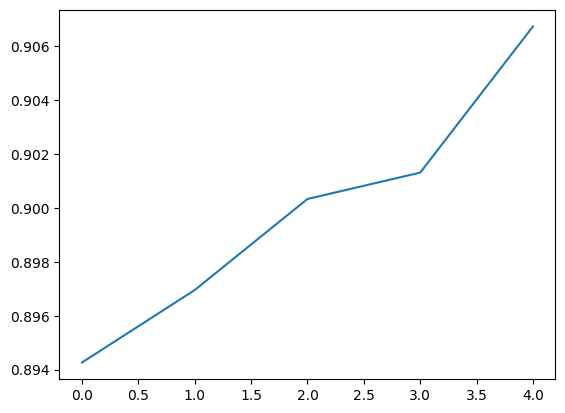

In [29]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'])


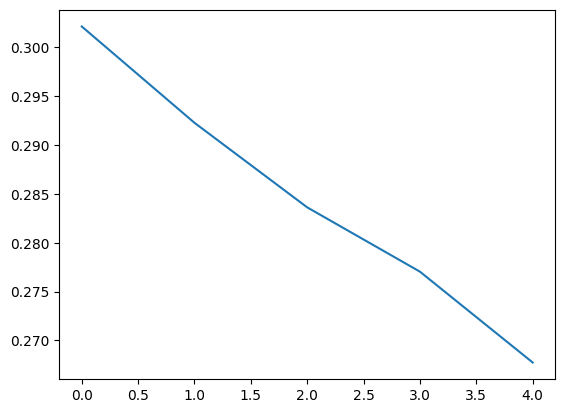

In [28]:
plt.plot(result.history['loss'])

In [30]:
model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9078 - loss: 0.2617
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9101 - loss: 0.2547
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9134 - loss: 0.2454
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9170 - loss: 0.2388
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9168 - loss: 0.2356
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9200 - loss: 0.2311
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9189 - loss: 0.2304
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9213 - loss: 0.2241
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9229 - loss: 0.2177
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9247 - loss: 0.2146
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9241 - loss: 0.2226
Epoch 12/20
1407/1407 ━━━━━━━━

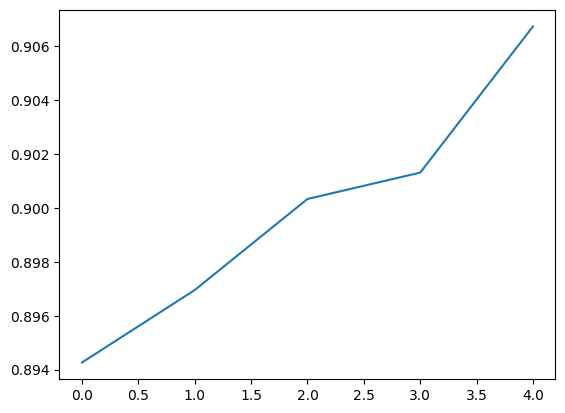

In [34]:
plt.plot(result.history['accuracy'])

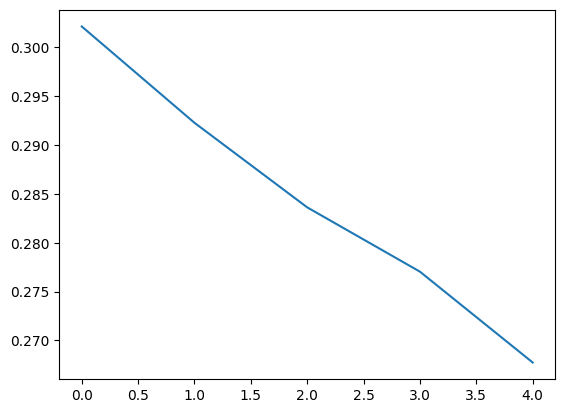

In [35]:
plt.plot(result.history['loss'])


In [36]:
model = model_fn()
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
result = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
    ) # 검증용 데이터



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7592 - loss: 0.6814 - val_accuracy: 0.8297 - val_loss: 0.4724
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8523 - loss: 0.4146 - val_accuracy: 0.8679 - val_loss: 0.3736
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8698 - loss: 0.3665 - val_accuracy: 0.8527 - val_loss: 0.3927
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8781 - loss: 0.3347 - val_accuracy: 0.8721 - val_loss: 0.3516
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8832 - loss: 0.3189 - val_accuracy: 0.8728 - val_loss: 0.3610
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8896 - loss: 0.3071 - val_accuracy: 0.8824 - val_loss: 0.3400
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8945 - loss: 0.2939 - val_accuracy: 0.8830 - val_loss: 0.3476
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8943 - loss: 0.2943

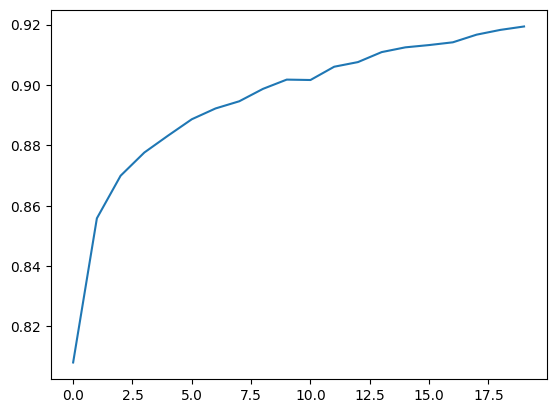

In [37]:
plt.plot(result.history['accuracy'])

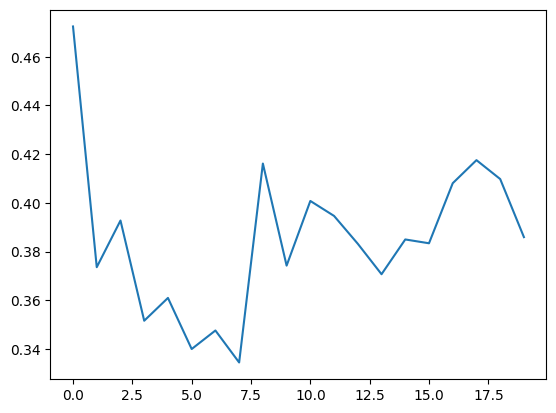

In [39]:
plt.plot(result.history['val_loss']) # 학습용 데이터에 치우쳐저 있어서 과대적합 됐다고 할 수 있음
# 다섯번째 에포크까지는 내려가지만 그 뒤에는 들쑥날쑥함 > 이 문제를 해결해야함

In [43]:
model = model_fn()
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
result = model.fit(
    train_scaled,
    train_target,
    epochs = 20,
    validation_data = (val_scaled, val_target)
)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7575 - loss: 0.6991 - val_accuracy: 0.8533 - val_loss: 0.4162
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8460 - loss: 0.4267 - val_accuracy: 0.8519 - val_loss: 0.4015
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8668 - loss: 0.3671 - val_accuracy: 0.8753 - val_loss: 0.3451
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8800 - loss: 0.3274 - val_accuracy: 0.8761 - val_loss: 0.3467
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8899 - loss: 0.3032 - val_accuracy: 0.8760 - val_loss: 0.3332
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8913 - loss: 0.2983 - val_accuracy: 0.8807 - val_loss: 0.3403
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8962 - loss: 0.2832 - val_accuracy: 0.8861 - val_loss: 0.3221
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8987 - loss: 0.2703

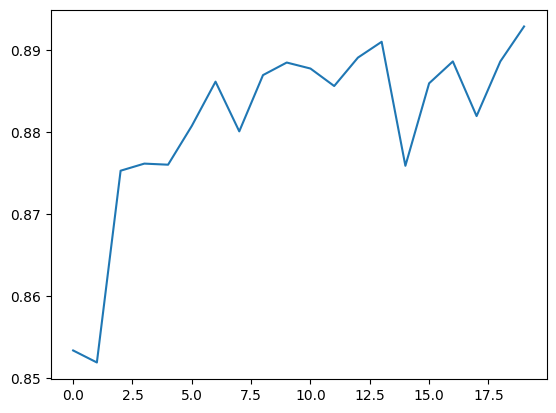

In [44]:
plt.plot(result.history['val_accuracy'])

In [47]:
# dropout 몇 퍼센트의 은닉 뉴런을 껐다 킬지
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
# 100개의 뉴런을 껐다키면서 결과를 출력함 (dropout)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']

  )
result = model.fit(
    train_scaled,
    train_target,
    epochs = 20,
    validation_data=(val_scaled, val_target)
)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7125 - loss: 0.8161 - val_accuracy: 0.8508 - val_loss: 0.4105
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8343 - loss: 0.4594 - val_accuracy: 0.8588 - val_loss: 0.3904
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8489 - loss: 0.4183 - val_accuracy: 0.8624 - val_loss: 0.3745
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8559 - loss: 0.3893 - val_accuracy: 0.8701 - val_loss: 0.3587
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8640 - loss: 0.3703 - val_accuracy: 0.8729 - val_loss: 0.3459
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8702 - loss: 0.3580 - val_accuracy: 0.8759 - val_loss: 0.3349
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8724 - loss: 0.3458 - val_accuracy: 0.8787 - val_loss: 0.3279
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8697 - loss: 0.3529

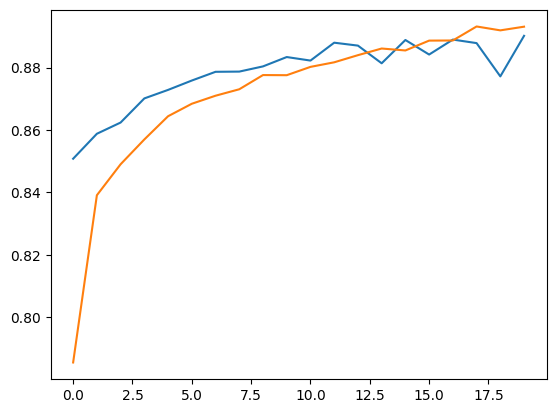

In [53]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])

In [56]:
model.save_weights('my_model.weights.h5')

In [58]:
model.save('my_model.keras') # 학습된 데이터를 저장

In [64]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']

    )
cp = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    save_best_only=True
) # 에포트를 돌릴때마다 정확도를 측정하는데 그때 저장하는 이름
# 가장 정확한 값 하나만 저장하기
es = keras.callbacks.EarlyStopping(patience=2)  # 점수가 더 높아질거같지않으면 중간에 스탑
model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[cp, es])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7183 - loss: 0.7960 - val_accuracy: 0.8427 - val_loss: 0.4340
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8354 - loss: 0.4575 - val_accuracy: 0.8573 - val_loss: 0.3937
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8487 - loss: 0.4138 - val_accuracy: 0.8618 - val_loss: 0.3833
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8564 - loss: 0.3916 - val_accuracy: 0.8727 - val_loss: 0.3498
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8617 - loss: 0.3727 - val_accuracy: 0.8732 - val_loss: 0.3494
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8677 - loss: 0.3601 - val_accuracy: 0.8780 - val_loss: 0.3323
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8703 - loss: 0.3522 - val_accuracy: 0.8793 - val_loss: 0.3346
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8777 - loss: 0.3335

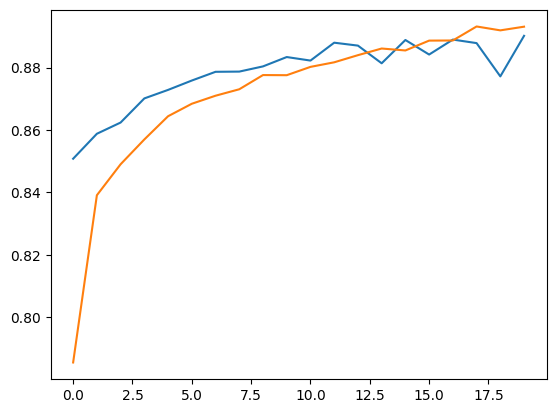

In [65]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])